## Введение в высшую математику
#### Практическое задание №6

##### 1. Решите линейную систему:


|1 2 3|        
|4 0 6| * X = $(12, 2, 1)^T$  
|7 8 9|  

In [3]:
import numpy as np
a = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9],
             ])
b = np.array([12, 2, 1])
np.linalg.solve(a, b)

array([-9.2       ,  0.9       ,  6.46666667])

##### 2. Найдите псевдорешение:
x + 2y – z = 1  
3x – 4y = 7  
8x – 5y + 2z = 12  
2x – 5z = 7  
11x +4y – 7z = 15  

In [5]:
import warnings
warnings.filterwarnings("ignore") 
a = np.array([[1, 2, -1],
              [3, -4, 0],
              [8, -5, 2],
              [2, 0, -5],
              [11, 4, -7],
             ])
b = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(a, b)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [6]:
# check
np.dot(a, [1.13919353, -0.90498444, -0.9009803])

array([ 0.23020495,  7.03751835, 11.83650984,  6.78328856, 15.21805317])

##### 3. Сколько решений имеет линейная система:
|1 2 3|        
|4 5 6| * X = $(12, 2, 1)^T$  
|7 8 9|  
Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [18]:
import numpy as np
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
             ])
b = np.array([[12, 2, 1]])

In [19]:
np.around(np.linalg.det(a), 1)

-0.0

In [22]:
c = np.concatenate((a, b.T), axis=1)
np.linalg.matrix_rank(a), np.linalg.matrix_rank(c)

(2, 3)

In [25]:
b = np.array([[3, 2, 1]])
c = np.concatenate((a, b.T), axis=1)
np.linalg.matrix_rank(a), np.linalg.matrix_rank(c)

(2, 2)

In [32]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
             ])
b = np.array([3, 2, 1])
np.linalg.solve(a, b), np.linalg.lstsq(a, b)

(array([ 0.33333333, -4.66666667,  4.        ]),
 (array([-1.94444444, -0.11111111,  1.72222222]),
  array([], dtype=float64),
  2,
  array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16])))

In [33]:
# check
np.dot(a, [0.33333333, -4.66666667,  4.]), np.dot(a, [-1.94444444, -0.11111111,  1.72222222])

(array([2.99999999, 1.99999997, 0.99999995]),
 array([3.        , 2.00000001, 1.00000002]))

##### 4. Вычислите LU-разложение матрицы:
| 1 2 3 |        
|2 16 21|  
|4 28 73|  
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [37]:
import scipy, scipy.linalg
a = np.array([[1, 2, 3],
              [2, 16, 21],
              [4, 28, 73],
             ])
P, L, U = scipy.linalg.lu(a)
P, L, U

(array([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]),
 array([[ 1.  ,  0.  ,  0.  ],
        [ 0.25,  1.  ,  0.  ],
        [ 0.5 , -0.4 ,  1.  ]]),
 array([[  4.  ,  28.  ,  73.  ],
        [  0.  ,  -5.  , -15.25],
        [  0.  ,   0.  , -21.6 ]]))

In [39]:
b = np.array([21, 9, 87])
np.linalg.solve(a, b)

array([25.69444444, -4.76388889,  1.61111111])

##### 5. Найдите нормальное псевдорешение недоопределенной системы:
x + 2y – z = 1  
8x – 5y + 2z = 12  
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

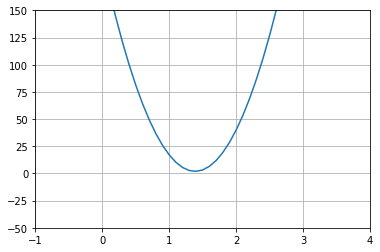

In [63]:
def Q(x, y):
    return (x**2 + y**2)

x = np.linspace(-10, 10, 201)
plt.plot(x, Q(x, 10*x - 14))
plt.axis([-1, 4, -50, 150])
plt.grid(True)
plt.show()

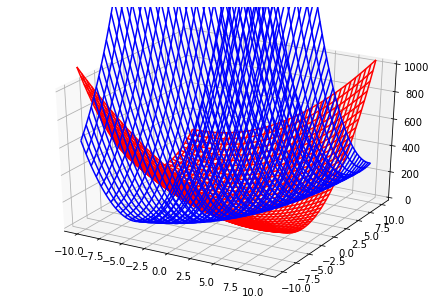

In [57]:
# решил попробовать с 3D
def Q3D(x, y, z):
    return (x**2 + y**2 + z**2)

from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
x = np.linspace(-10, 10, 201)
y = np.linspace(-10, 10, 201)
x, y = np.meshgrid(x, y)
ax.set_zlim(0, 1000)
ax.plot_wireframe(x, y, Q3D(x, y, x + 2*y - 1), color='red')
ax.plot_wireframe(x, y, Q3D(x, y, (12 - 8*x + 5*y)/2), color='blue')
plt.show()

In [40]:
a = np.array([[1, 2, -1],
              [8, -5, 2],
             ])
b = np.array([1, 12])

In [44]:
np.linalg.lstsq(a, b)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

##### 6. Найдите одно из псевдорешений вырожденной системы:
|1 2 3|        
|4 5 6| * X = $(2, 5, 11)^T$  
|7 8 9|  
Попробуйте также отыскать и нормальное псевдорешение.

In [64]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
             ])
b = np.array([2, 5, 11])
np.linalg.solve(a, b), np.linalg.lstsq(a, b)

(array([ 9.45755922e+15, -1.89151184e+16,  9.45755922e+15]),
 (array([ 1.25,  0.5 , -0.25]),
  array([], dtype=float64),
  2,
  array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16])))

In [70]:
Q, R = np.linalg.qr(a)
R1 = R[:2, :2]
B1 = np.dot(Q.T, b)[:2]
x = np.append(np.linalg.solve(R1, B1), 0)
x, np.linalg.norm(x)

(array([1.50000000e+00, 9.45096256e-15, 0.00000000e+00]), 1.4999999999999893)

In [71]:
np.linalg.norm(np.dot(a, x) - b)

1.2247448713915885